### 서울시 구별 CCTV/인구 분석

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus']=False
mpl.rcParams['font.family']='Malgun Gothic'

In [3]:
df = pd.read_csv('../Day04/cctv_pop.csv', index_col='구별')
df.head()

,cctv댓수,최근증가율,인구수,내국인,외국인,노령자,외국인비율,노령자비율
구별,,,,,,,,
종로구,1715,20.689655,153789,144683,9106,27818,5.921100,18.088420
중구,2447,78.984238,131787,122499,9288,24392,7.047736,18.508654
용산구,2611,78.635682,237285,222953,14332,39070,6.039994,16.465432
성동구,3829,63.485477,292672,285990,6682,46380,2.283102,15.847092
광진구,3211,112.292359,352627,339996,12631,51723,3.581972,14.667907


- 상관관계 분석
    - CCTV 대수 vs 인구수, 외국인비율, 고령자 비율

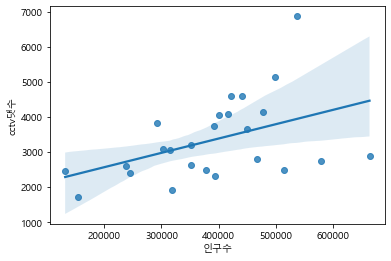

In [7]:
# cctv vs 인구수
sns.regplot(x='인구수', y='cctv댓수', data=df)
plt.show()


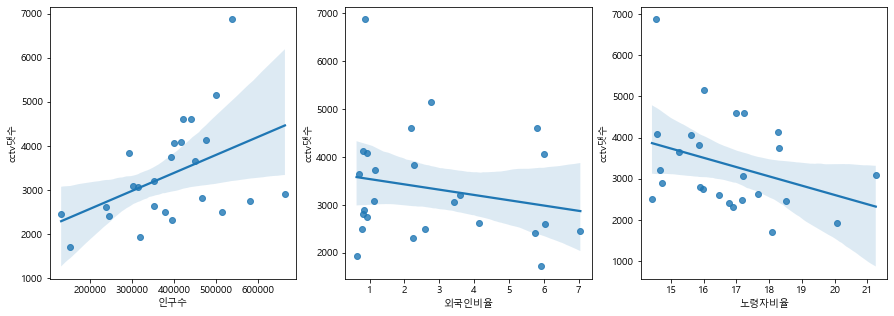

In [12]:
_, axs = plt.subplots(1, 3, figsize=(15,5))
features = ['인구수','외국인비율','노령자비율']
for i, feature in enumerate(features):
    sns.regplot(x=feature, y='cctv댓수', data=df, ax=axs[i])

- 구별 CCTV 댓수 시각화

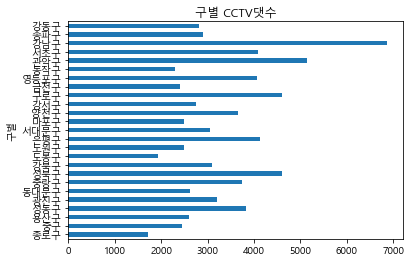

In [13]:
df.cctv댓수.plot(kind='barh')
plt.title('구별 CCTV댓수')
plt.show()

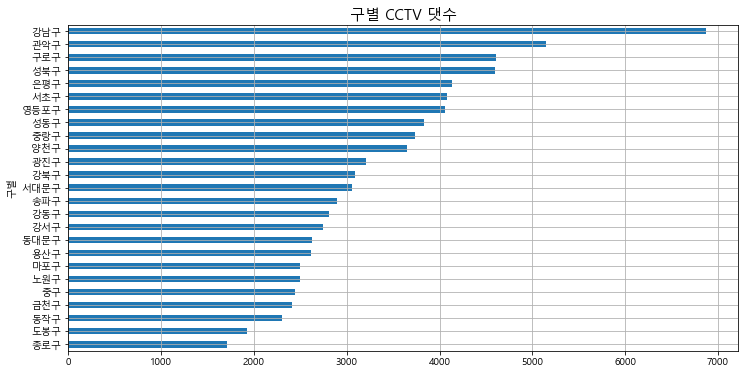

In [15]:
df.cctv댓수.sort_values().plot(kind='barh', grid=True, figsize=(12,6))
plt.title('구별 CCTV 댓수', fontsize=15)
plt.show()

- 인구대비 CCTV 비율 시각화

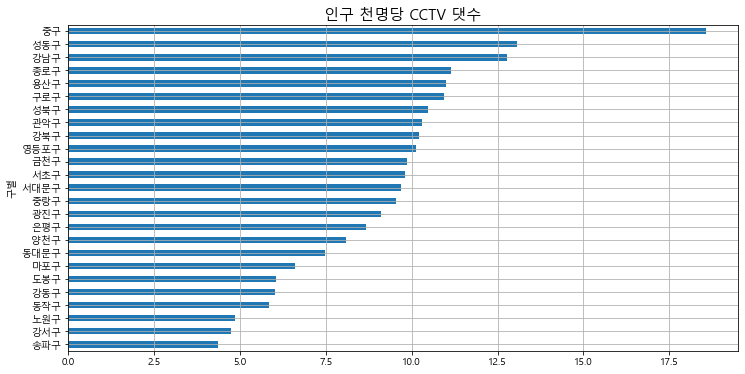

In [18]:
# 천명당 CCTV 댓수
df['CCTV비율']=(df.cctv댓수/(df.인구수/1000)).round(2)
df.CCTV비율.sort_values().plot(kind='barh', grid=True, figsize=(12,6))
plt.title('인구 천명당 CCTV 댓수', fontsize=15)
plt.show()

- 산점도

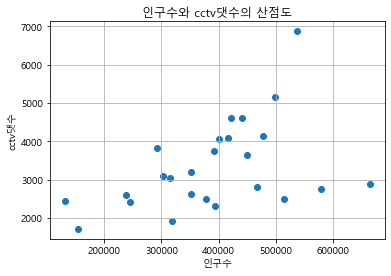

In [22]:
plt.scatter(x=df.인구수, y=df.cctv댓수)
plt.title('인구수와 cctv댓수의 산점도')
plt.xlabel('인구수'), plt.ylabel('cctv댓수')
plt.grid()
plt.show()

- 회귀선

In [23]:
weight, bias = np.polyfit(df.인구수, df.cctv댓수,1)#x,y,1차식
weight, bias

(0.004085429243410676, 1751.2460231825626)

In [25]:
x=np.array([100000,700000])
y=weight*x+bias
y

array([2159.78894752, 4611.04649357])

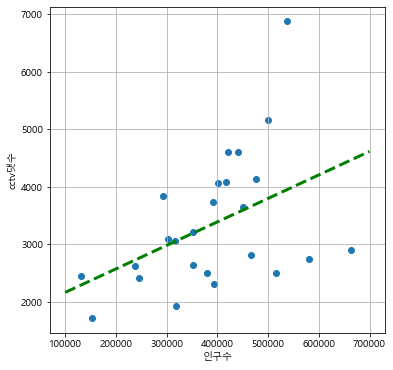

In [26]:
plt.figure(figsize=(6,6))
plt.scatter(x=df.인구수, y=df.cctv댓수)
plt.plot(x,y,'g--',lw=3)
plt.xlabel('인구수'), plt.ylabel('cctv댓수')
plt.grid()
plt.show()

- 회귀선과 산점도 사이의 절대오차

In [30]:
df['오차']=abs(df.cctv댓수-(df.인구수*weight+bias)).round(2)#absolute
df_sort = df.sort_values(by='오차', ascending=False)
df_sort.head()

,cctv댓수,최근증가율,인구수,내국인,외국인,노령자,외국인비율,노령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,6871,63.241716,537800,533042,4758,78226,0.884716,14.545556,12.78,2922.61
송파구,2897,204.309392,663965,658338,5627,97691,0.847484,14.713276,4.36,1566.83
강서구,2744,79.114391,579768,574315,5453,92558,0.940549,15.964662,4.73,1375.85
노원구,2492,68.471810,514946,510956,3990,88345,0.774839,17.156168,4.84,1363.02
관악구,5149,48.294597,499449,485699,13750,79871,2.753034,15.991823,10.31,1357.29


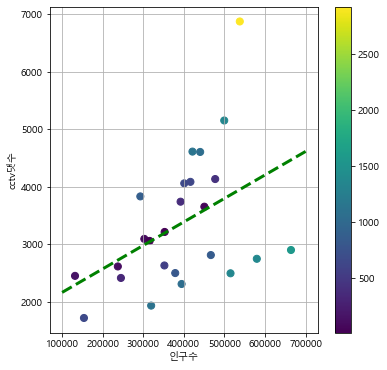

In [31]:
plt.figure(figsize=(6,6))
plt.scatter(x=df.인구수, y=df.cctv댓수, c=df.오차, s=50)
plt.plot(x,y,'g--',lw=3)
plt.xlabel('인구수'), plt.ylabel('cctv댓수')
plt.colorbar()
plt.grid()
plt.show()

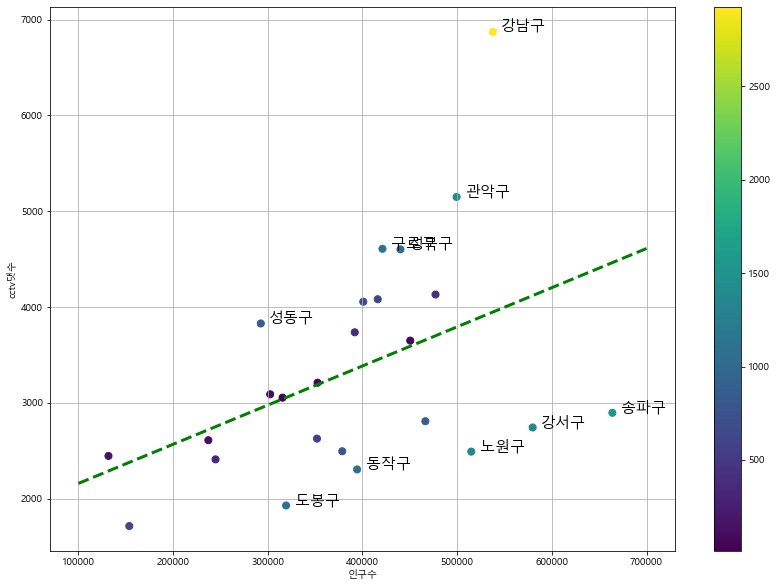

In [34]:
plt.figure(figsize=(14,10))
plt.scatter(x=df.인구수, y=df.cctv댓수, c=df.오차, s=50)
plt.plot(x,y,'g--',lw=3)
for i in range(10):
    plt.text(df_sort.인구수[i]+9000, df_sort.cctv댓수[i],df_sort.index[i], fontsize=15)
plt.xlabel('인구수'), plt.ylabel('cctv댓수')
plt.colorbar()
plt.grid()
plt.show()